In [1]:
# import the usual suspects ...
import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
import seaborn as sns

# suppress all warnings
import warnings
warnings.filterwarnings("ignore")

> **Accidents**

In [2]:
accidents=pd.read_csv("Accident_Information.csv")
vehicles=pd.read_csv("Vehicle_Information.csv",encoding="ISO-8859-1")


In [38]:
accidents.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Junction_Control,Junction_Detail,Light_Conditions,...,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Urban_or_Rural_Area,Weather_Conditions,Year,Daytime
0,200501BS00001,A,3218.0,Serious,None,2005-01-04,Tuesday,Data missing or out of range,Not at junction or within 20 metres,Daylight,...,1,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,Urban,Raining no high winds,2005,3
1,200501BS00002,B,450.0,Slight,None,2005-01-05,Wednesday,Auto traffic signal,Crossroads,Darkness - lights lit,...,1,Metropolitan Police,Dry,Dual carriageway,None,30.0,Urban,Fine no high winds,2005,3
2,200501BS00003,C,0.0,Slight,None,2005-01-06,Thursday,Data missing or out of range,Not at junction or within 20 metres,Darkness - lights lit,...,2,Metropolitan Police,Dry,Single carriageway,None,30.0,Urban,Fine no high winds,2005,5
3,200501BS00004,A,3220.0,Slight,None,2005-01-07,Friday,Data missing or out of range,Not at junction or within 20 metres,Daylight,...,1,Metropolitan Police,Dry,Single carriageway,None,30.0,Urban,Fine no high winds,2005,2
4,200501BS00005,Unclassified,0.0,Slight,None,2005-01-10,Monday,Data missing or out of range,Not at junction or within 20 metres,Darkness - lighting unknown,...,1,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,Urban,Fine no high winds,2005,4


**Vehicles**

In [3]:
print('Records:', vehicles.shape[0], '\nColumns:', vehicles.shape[1])
vehicles.head()

Records: 2177205 
Columns: 24


,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,...,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year
0,200401BS00001,26 - 35,3.0,Urban area,4.0,1588.0,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
1,200401BS00002,26 - 35,NaN,Urban area,3.0,NaN,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,109,Data missing or out of range,Front,2004
2,200401BS00003,26 - 35,4.0,Data missing or out of range,NaN,998.0,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Turning right,1,109,Data missing or out of range,Front,2004
3,200401BS00003,66 - 75,NaN,Data missing or out of range,NaN,NaN,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
4,200401BS00004,26 - 35,1.0,Urban area,4.0,124.0,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,Data missing or out of range,Front,2004


#### 2.1. Handling Date and Time
<a id='2.1. Handling Date and Time'></a>

We had our `Date` columnwith values not properly stored in the correct format. Let's do this now:

In [46]:
accidents['Date']= pd.to_datetime(accidents['Date'], format="%Y-%m-%d")

# check
accidents.iloc[:, 5:13].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2047061 entries, 0 to 2047255
Data columns (total 8 columns):
Date                          datetime64[ns]
Day_of_Week                   object
Junction_Control              object
Junction_Detail               object
Light_Conditions              object
Local_Authority_(District)    object
Local_Authority_(Highway)     object
Number_of_Casualties          int64
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 140.6+ MB


In [54]:
accidents['Date']

0         2005-01-04
1         2005-01-05
2         2005-01-06
3         2005-01-07
4         2005-01-10
5         2005-01-11
6         2005-01-13
7         2005-01-14
8         2005-01-15
9         2005-01-15
10        2005-01-16
11        2005-01-25
12        2005-01-11
13        2005-01-18
14        2005-01-18
15        2005-01-18
16        2005-01-20
17        2005-01-21
18        2005-01-21
19        2005-01-08
20        2005-01-24
21        2005-01-24
22        2005-01-24
23        2005-01-18
24        2005-01-29
25        2005-01-19
26        2005-01-30
27        2005-01-29
28        2005-02-01
29        2005-02-02
             ...    
2047226   2017-08-06
2047227   2017-08-05
2047228   2017-08-07
2047229   2017-08-09
2047230   2017-08-16
2047231   2017-08-09
2047232   2017-09-10
2047233   2017-09-24
2047234   2017-10-06
2047235   2017-10-15
2047236   2017-10-09
2047237   2017-10-20
2047238   2017-10-28
2047239   2017-10-26
2047240   2017-10-05
2047241   2017-10-31
2047242   201

In [62]:
accidents['today'] = pd.Timestamp('20050104')
accidents['Date'] = (accidents['Date'] - accidents['today']).dt.days

Next, let's define a new column that groups the `Time` the accidents happened into one of five options:
- Morning Rush from 5am to 10am --> value 1
- Office Hours from 10am to 3pm (or: 10:00 - 15:00) --> value 2
- Afternoon Rush from 3pm to 7pm (or: 15:00 - 19:00) --> value 3
- Evening from 7pm to 11pm (or: 19:00 - 23:00) --> value 4
- Night from 11pm to 5am (or: 23:00 - 05:00) --> value 5

In [5]:
# slice first and second string from time column
accidents['Hour'] = accidents['Time'].str[0:2]

# convert new column to numeric datetype
accidents['Hour'] = pd.to_numeric(accidents['Hour'])

# drop null values in our new column
accidents = accidents.dropna(subset=['Hour'])

# cast to integer values
accidents['Hour'] = accidents['Hour'].astype('int')

In [6]:
# define a function that turns the hours into daytime groups
def when_was_it(hour):
    if hour >= 5 and hour < 10:
        return "1"
    elif hour >= 10 and hour < 15:
        return "2"
    elif hour >= 15 and hour < 19:
        return "3"
    elif hour >= 19 and hour < 23:
        return "4"
    else:
        return "5"

In [7]:
# create a little dictionary to later look up the groups I created
daytime_groups = {1: 'Morning: Between 5 and 10', 
                  2: 'Office Hours: Between 10 and 15', 
                  3: 'Afternoon Rush: Between 15 and 19', 
                  4: 'Evening: Between 19 and 23', 
                  5: 'Night: Between 23 and 5'}

In [8]:
# apply this function to our temporary hour column
accidents['Daytime'] = accidents['Hour'].apply(when_was_it)
accidents[['Time', 'Hour', 'Daytime']].head()

,Time,Hour,Daytime
0,17:42,17,3
1,17:36,17,3
2,00:15,0,5
3,10:35,10,2
4,21:13,21,4


In [9]:
# drop old time column and temporary hour column
accidents = accidents.drop(columns=['Hour'])

#### 2.2. Handling Missing Values
<a id='2.2. Handling Missing Values'></a>

In [10]:
print('Proportion of Missing Values in Accidents Table:', 
      round(accidents.isna().sum().sum()/len(accidents), 3), '%')

Proportion of Missing Values in Accidents Table: 0.495 %


In [11]:
#accidents.isna().sum()

In [13]:
print('Proportion of Missing Values in Vehicles Table:', 
      round(vehicles.isna().sum().sum()/len(vehicles),3), '%')

Proportion of Missing Values in Vehicles Table: 0.938 %


In [14]:
#vehicles.isna().sum()

In [17]:
df.info()    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1704137 entries, 0 to 2058195
Data columns (total 10 columns):
Accident_Index          object
Accident_Severity       object
Daytime                 object
Speed_limit             float64
Urban_or_Rural_Area     object
Age_Band_of_Driver      object
Age_of_Vehicle          float64
Sex_of_Driver           object
Engine_Capacity_.CC.    float64
Vehicle_Manoeuvre       object
dtypes: float64(3), object(7)
memory usage: 143.0+ MB


In [18]:
# cast categorical features - currently stored as string data - to their proper data format
for col in ['Accident_Severity', 'Daytime', 'Speed_limit', 'Urban_or_Rural_Area',
            'Age_Band_of_Driver', 'Sex_of_Driver', 'Vehicle_Manoeuvre']:
    df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1704137 entries, 0 to 2058195
Data columns (total 10 columns):
Accident_Index          object
Accident_Severity       category
Daytime                 category
Speed_limit             category
Urban_or_Rural_Area     category
Age_Band_of_Driver      category
Age_of_Vehicle          float64
Sex_of_Driver           category
Engine_Capacity_.CC.    float64
Vehicle_Manoeuvre       category
dtypes: category(7), float64(2), object(1)
memory usage: 63.4+ MB


*Back to: <a href='#Table of Contents'> Table of Contents</a>*
#### 2.4. Handling Numerical Data 
<a id='2.4. Handling Numerical Data'></a>

*Detecting Outliers*

In [19]:
# define numerical columns
num_cols = ['Age_of_Vehicle', 'Engine_Capacity_.CC.']

*Handling Outliers*

In [21]:
df['Engine_Capacity_.CC.'].describe()

count    1.704137e+06
mean     2.034436e+03
std      1.909883e+03
min      1.000000e+00
25%      1.299000e+03
50%      1.598000e+03
75%      1.997000e+03
max      9.600000e+04
Name: Engine_Capacity_.CC., dtype: float64

In [22]:
# phrasing condition
condition = (df['Engine_Capacity_.CC.'] < 20000)

# keep only records that meet the condition and don't fall within extreme outliers
df = df[condition]

*Binning Age_of_Vehicle Feature*

In [68]:
df['Age_of_Vehicle']

0          3
1          3
2          3
3          5
4          1
5          2
7          3
8          5
9          3
10         1
11         2
12         3
13         2
14         1
15         4
16         1
17         3
18         1
20         3
21         1
22         3
23         5
24         3
25         1
26         4
28         3
29         5
30         3
31         3
32         3
          ..
2058157    3
2058158    5
2058159    5
2058160    5
2058161    1
2058163    4
2058164    2
2058166    4
2058167    1
2058168    2
2058169    5
2058170    3
2058171    1
2058172    2
2058173    4
2058175    4
2058177    3
2058178    3
2058180    5
2058181    3
2058183    4
2058184    3
2058185    1
2058186    3
2058187    1
2058189    4
2058190    5
2058191    5
2058194    5
2058195    3
Name: Age_of_Vehicle, Length: 1704053, dtype: category
Categories (5, int64): [1, 2, 3, 4, 5]

In [26]:
# re-define numerical feature columns - only one left
num_cols = ['Engine_Capacity_.CC.']

*Feature Scaling*

If you use a distance based algorithm and your numerical features’ range vary widely, the algorithm won’t work properly unless the range of all features is normalized.

Tree based models, which we will use here, are not distance based and can handle varying ranges of features. Therefore scaling is not required.

*Back to: <a href='#Table of Contents'> Table of Contents</a>*
#### 2.5. Handling Categorical Data
<a id='2.5. Handling Categorical Data'></a>

In [27]:
# define categorical feature columns
cat_cols = ['Daytime', 'Speed_limit', 'Urban_or_Rural_Area',
            'Age_Band_of_Driver', 'Age_of_Vehicle', 'Sex_of_Driver', 'Vehicle_Manoeuvre']

# define target col
target_col = ['Accident_Severity']

cols = cat_cols + num_cols + target_col

# copy dataframe - just to be safe
df_model = df[cols].copy()
df_model.shape

(1704053, 9)

*Encoding categorical features*

In [28]:
# create dummy variables from the categorical features
dummies = pd.get_dummies(df_model[cat_cols], drop_first=True)
df_model = pd.concat([df_model[num_cols], df_model[target_col], dummies], axis=1)
df_model.shape

(1704053, 51)

In [29]:
df_model.isna().sum().sum()

0

*Back to: <a href='#Table of Contents'> Table of Contents</a>*
### 3. Modeling the Data
<a id='3. Modeling the Data'></a>

#### 3.1. Train-Test-Split
<a id='3.1. Train-Test-Split'></a>

In [30]:
# define our features 
features = df_model.drop(['Accident_Severity'], axis=1)

# define our target
target = df_model[['Accident_Severity']]

In [31]:
from sklearn.model_selection import train_test_split

# split our data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

#### 3.2. Handling Imbalanced Classes
<a id='3.2. Handling Imbalanced Classes'></a>

If we have a target vector with highly imbalanced classes ...

In [32]:
df_model['Accident_Severity'].value_counts(normalize=True)

Slight     0.859266
Serious    0.127227
Fatal      0.013508
Name: Accident_Severity, dtype: float64

... and we can't apply the best strategy and simply can't collect more data, especially from the minority class, we need to find other ways to deal with imbalanced classes.

- A second strategy is to use a model evaluation metric better suited to imbalances classes: confusion matrices, precision, recall, F1 scores, or ROC curves instead of accuracy.
- A third strategy is to use the class weighing parameter included in implementations of some models. This allows us to have the algorithm adjust for imbalanced classes.
- The fourth and fifth strategies are related: downsampling and upsampling. Several of these resampling stratgies are well summarized in this [blog post by Chris Remmel](https://calremmel.github.io/fraud-detection-part-one.html).

Let's focus on class **weight parameters**: The Random Forest Classifier we will use now is a popular classification algorithm and includes a `class_weight` parameter.

*Back to: <a href='#Table of Contents'> Table of Contents</a>*
#### 3.3. Training and Evaluating Random Forest Classifier with class_weight
<a id='3.3. Training and Evaluating Random Forest Classifier with class_weight'></a>

In [33]:
# import classifier
from sklearn.ensemble import RandomForestClassifier

# import metrics
from sklearn.metrics import classification_report, confusion_matrix

# import evaluation tools
from sklearn.model_selection import KFold, cross_val_score

In [34]:
# instantiate RandomForestClassifier with entropy and class_weight
forest_1 = RandomForestClassifier(random_state=4, criterion='entropy', n_jobs=-1, class_weight='balanced')

# train
forest_1.fit(X_train, y_train)

# predict
y_test_preds  = forest_1.predict(X_test)

# evaluate
report = classification_report(y_test, y_test_preds)
print('Classification Report Random Forest - with Entropy and class_weight Parameter: \n', report)

Classification Report Random Forest - with Entropy and class_weight Parameter: 
               precision    recall  f1-score   support

       Fatal       0.03      0.09      0.04      4653
     Serious       0.16      0.24      0.19     43168
      Slight       0.87      0.79      0.83    292990

    accuracy                           0.71    340811
   macro avg       0.36      0.37      0.36    340811
weighted avg       0.77      0.71      0.74    340811



In [35]:
# cross-validation with F1 score (more appropriate to imbalanced classes)
cross_val_score(forest_1, X_train, y_train, scoring='f1_macro', n_jobs=-1)

array([0.35615492, 0.35609864, 0.35709449])

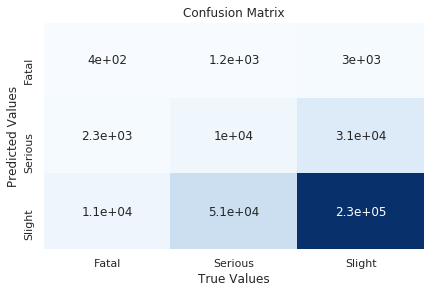

In [36]:
# create confusion matrix# create confusion matrix
matrix = confusion_matrix(y_test, y_test_preds)

# create dataframe
class_names = df_model.Accident_Severity.values
dataframe = pd.DataFrame(matrix, index=['Fatal', 'Serious', 'Slight'], 
                         columns=['Fatal', 'Serious', 'Slight'])

# create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout(), plt.xlabel('True Values'), plt.ylabel('Predicted Values')
plt.show()

*Back to: <a href='#Table of Contents'> Table of Contents</a>*
#### 3.4. Training and Evaluating Random Forest Classifier with SMOTE
<a id='3.4. Training and Evaluating Random Forest Classifier with SMOTE'></a>

The Random Forest using the `weight_class` parameter did not perform very well on classifying the severity. So let's try one of the resampling strategies to deal properly with our imbalances target classes: **Synthetic Minority Over-sampling Technique (SMOTE)**. Here we're repeatedly sample with replacement from the minority class to make it of equal size as the majority class. To be more specific: We're creating new synthetic data for the minority class - that is representative but not exact duplicate - using K-Nearest Neighbors.

In [37]:
from imblearn.over_sampling import SMOTE

ImportError: No module named 'imblearn'

In [ ]:
# view previous class distribution
print('Before Upsampling with SMOTE:'), print(target['Accident_Severity'].value_counts())

# resample data ONLY using training data
X_resampled, y_resampled = SMOTE().fit_sample(X_train, y_train) 

# view synthetic sample class distribution
print('\nAfter Upsampling with SMOTE:'), print(pd.Series(y_resampled).value_counts())

In [ ]:
# then perform ususal train-test-split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=0)

In [ ]:
# instantiate second RandomForestClassifier with entropy and SMOTE
forest_2 = RandomForestClassifier(random_state=4, criterion='entropy', n_jobs=-1)

# train
forest_2.fit(X_train, y_train)

# predict
y_test_preds = forest_2.predict(X_test)

# evaluate
report = classification_report(y_test, y_test_preds)
print('Classification Report Random Forest - with Entropy and SMOTE Upsampling: \n', report)

In [ ]:
# cross-validation with F1 score (more appropriate to imbalanced classes)
cross_val_score(forest_2, X_train, y_train, scoring='f1_macro', n_jobs=-1)

In [ ]:
# create confusion matrix
matrix = confusion_matrix(y_test, y_test_preds)

# create dataframe
class_names = df_model.Accident_Severity.values
dataframe = pd.DataFrame(matrix, index=['Fatal', 'Serious', 'Slight'], 
                         columns=['Fatal', 'Serious', 'Slight'])

# create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout(), plt.xlabel('True Values'), plt.ylabel('Predicted Values')
plt.show()

In [ ]:
# plot the important features
feat_importances = pd.Series(forest_2.feature_importances_, index=features.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh', color='darkgrey', figsize=(10,5))
plt.xlabel('Relative Feature Importance with Random Forest');